# **Import Package**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Import Data**

In [ ]:
df_train = pd.read_csv('Training Data.csv', sep=',')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df_train['Risk_Flag'].value_counts()

,count
Risk_Flag,
0,221004
1,30996


# **EDA**

## **Deskriptive Statistics**

### Mengubah nama kolom menjadi huruf kecil semua

In [ ]:
# Mengubah nama kolom menjadi huruf kecil semua
df_train.columns = df_train.columns.str.lower()
df_train.head()

,id,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### Mengubah Id menjadi tipe data Object

In [ ]:
df_train['id'] = df_train['id'].astype(object)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 252000 non-null  object
 1   income             252000 non-null  int64 
 2   age                252000 non-null  int64 
 3   experience         252000 non-null  int64 
 4   married/single     252000 non-null  object
 5   house_ownership    252000 non-null  object
 6   car_ownership      252000 non-null  object
 7   profession         252000 non-null  object
 8   city               252000 non-null  object
 9   state              252000 non-null  object
 10  current_job_yrs    252000 non-null  int64 
 11  current_house_yrs  252000 non-null  int64 
 12  risk_flag          252000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 25.0+ MB


## **Membuat kolom kategori rentang gaji dari Q1-Q3**


In [ ]:
Q1 = df_train['income'].quantile(0.25)
Q2 = df_train['income'].quantile(0.50)  # Ini adalah median
Q3 = df_train['income'].quantile(0.75)

# Menambahkan kolom kategori menggunakan lambda
df_train['income_cats'] = df_train['income'].apply(lambda score: 'low' if score <= Q1 else ('mid' if score <= Q2 else 'high'))
df_train.head()

,id,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_cats
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,low
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,high
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,mid
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,high
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,high


### **Mengecek Missing value**

In [ ]:
df_train.isnull().sum()\
    .to_frame('missing value')\
    .style.map(lambda val : 'background-color: red' if val > 0 else '' )

,missing value
id,0
income,0
age,0
experience,0
married/single,0
house_ownership,0
car_ownership,0
profession,0
city,0
state,0


### Memisahkan kolom categori dan numerik

In [ ]:
cats = ['married/single', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']
nums = ['income', 'age', 'experience', 'current_job_yrs','current_house_yrs']
num_df = df_train.select_dtypes(include=['number'])
cat_df = df_train.select_dtypes(exclude=['number'])

### Statistical Summary kolom numerik

In [ ]:
df_train.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
income,252000.0,4997116.67,2878311.01,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
age,252000.0,49.95,17.06,21.0,35.0,50.0,65.0,79.0
experience,252000.0,10.08,6.00,0.0,5.0,10.0,15.0,20.0
current_job_yrs,252000.0,6.33,3.65,0.0,3.0,6.0,9.0,14.0
current_house_yrs,252000.0,12.00,1.40,10.0,11.0,12.0,13.0,14.0
risk_flag,252000.0,0.12,0.33,0.0,0.0,0.0,0.0,1.0


### Interpretasi
* Kolom income dan age memiliki rentang nilai median dan mean yang tidak jauh beda
* Kolom income memiliki perbedaan nilai min/max yang cukup signifikan dengan mean/median mengindikasi kan ada kesalahan input, Kolom income juga memiliki standard deviasi yang sangat besar
* Kolom experience, current_job_yrs, current_house_yrs tidak memiliki perbedaan signifikan
  



### Statistical kolom Categori

In [ ]:
df_train[cats].describe()

,married/single,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


### Interpretasi
* married/single sebagian besar orang berstatus single dimana terjadi ketimpangan yang cukup signifikan daripada orang yang berstatus married
* house_ownership juga menunjukkan ketimpangan yang signifikan dimana sebagian besar rented / penyewa daripada yang memiliki rumah dan homeless
* car_ownership menunjukkan sebagian besar orang tidak memiliki mobil sehingga terjadi ketimpangan cukup signifikan daripada yang memiliki mobil
* profession,city, state memilki kategori yang cukup banyak sehingga sulit untuk disimpulkan apakah ada ketimpangan yang signifikan

In [ ]:
df_train['married/single'].value_counts()

,count
married/single,
single,226272
married,25728


In [ ]:
df_train['house_ownership'].value_counts()

,count
house_ownership,
rented,231898
owned,12918
norent_noown,7184


In [ ]:
df_train['car_ownership'].value_counts()

,count
car_ownership,
no,176000
yes,76000


## **Univariate Analysis**

### Data Numeric

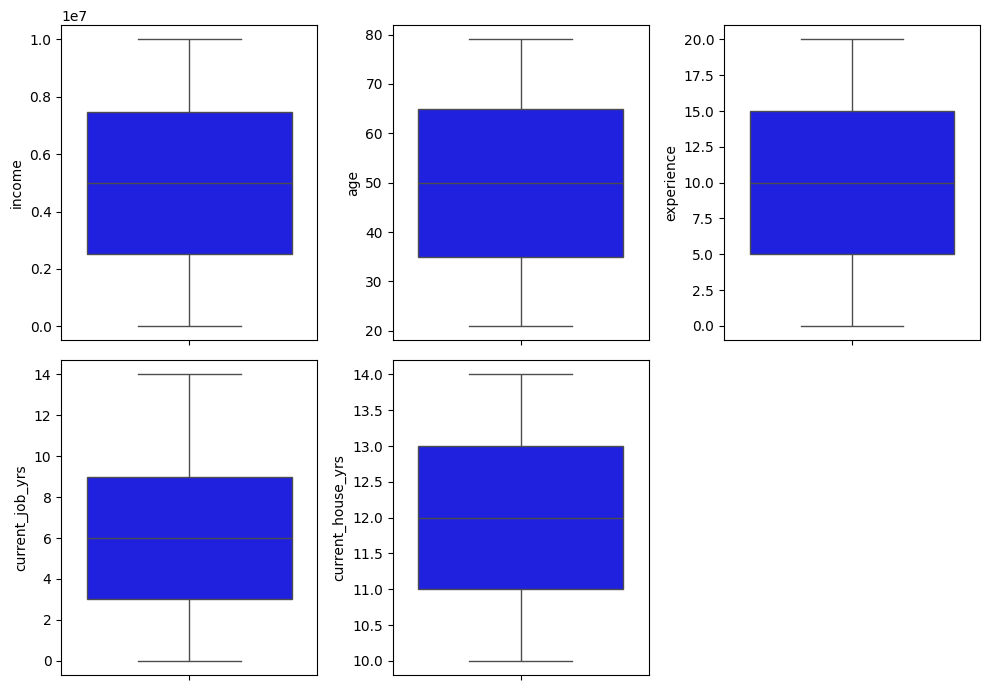

In [ ]:
# Analis Boxplot
plt.figure(figsize=(10,7))

for i in range(0, len(nums)):
  plt.subplot(2,3, i+1)
  sns.boxplot(df_train[nums[i]], orient='v', color='blue')
  plt.tight_layout()

plt.show()

## Interpretasi

Gambar di atas merupakan hasil Boxplot untuk feature numerik (income, age, experience, current_job_yrs dan current_house_yrs). Hasil Boxplot menunjukkan tidak terdapat adanya outlier untuk seluruh feature numerik.


**Univariate numerik kontinu**

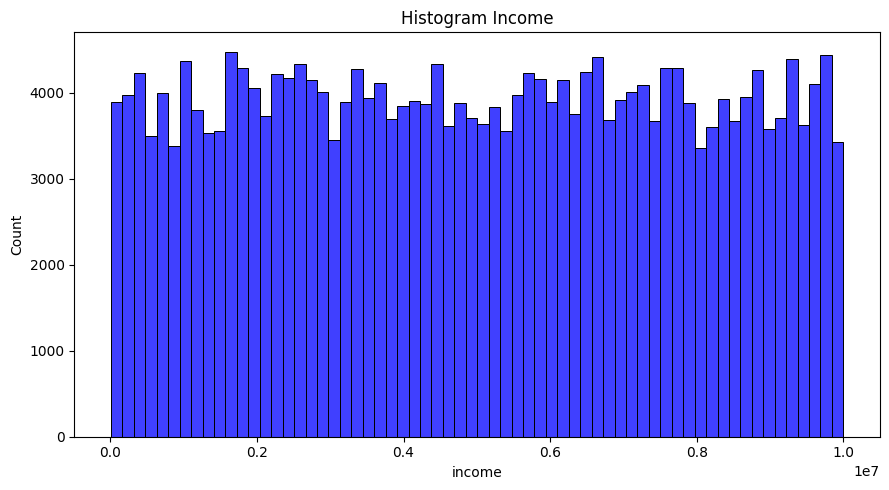

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(df_train, x= df_train['income'],color='blue')
plt.title("Histogram Income")
plt.tight_layout()
plt.show()

## Interpretasi
Grafik di atas menunjukkan distribusi pendapatan kreditur yang cukup beragam atau bisa dikatakan bahwa kreditur berasal dari kelas ekonomi yang beragam.


**Univariate numerik diskrit**

<Figure size 1200x1200 with 0 Axes>

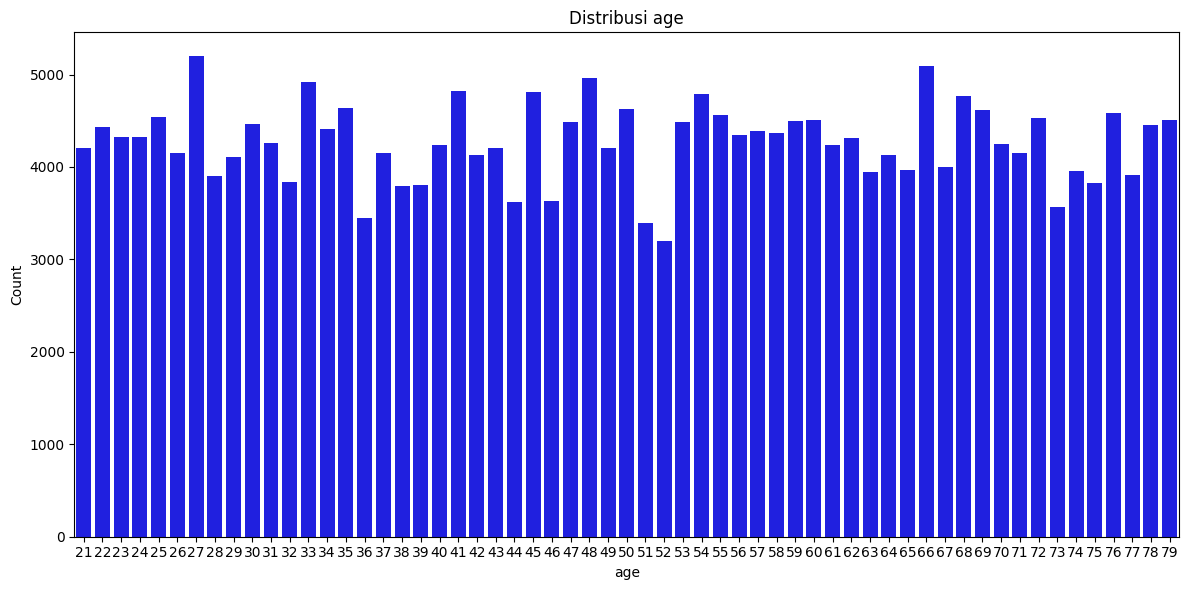

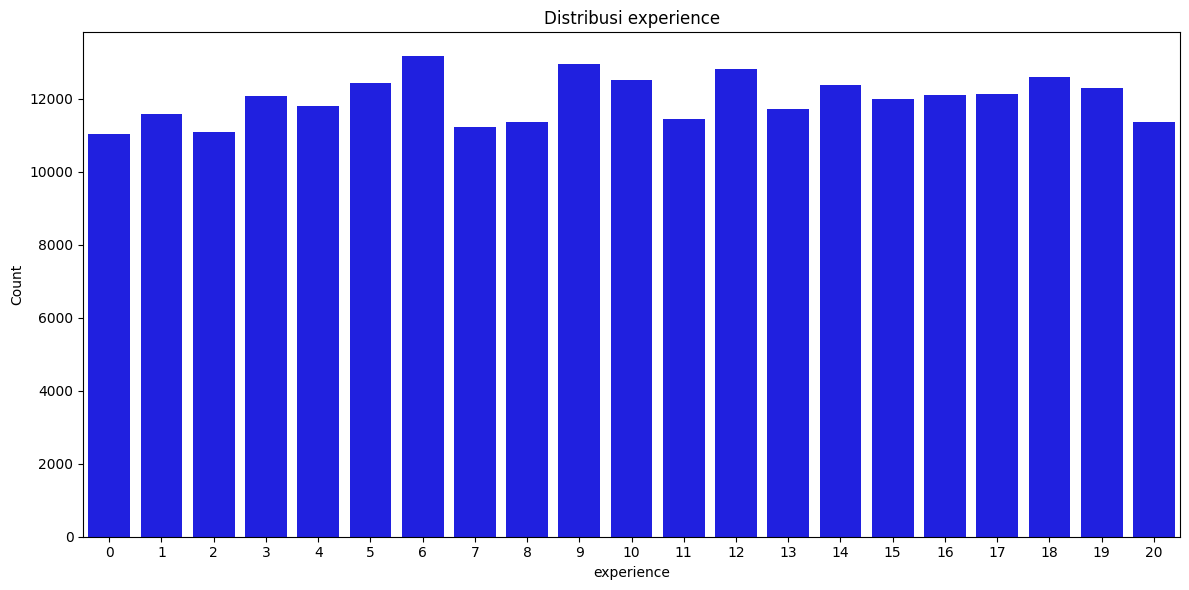

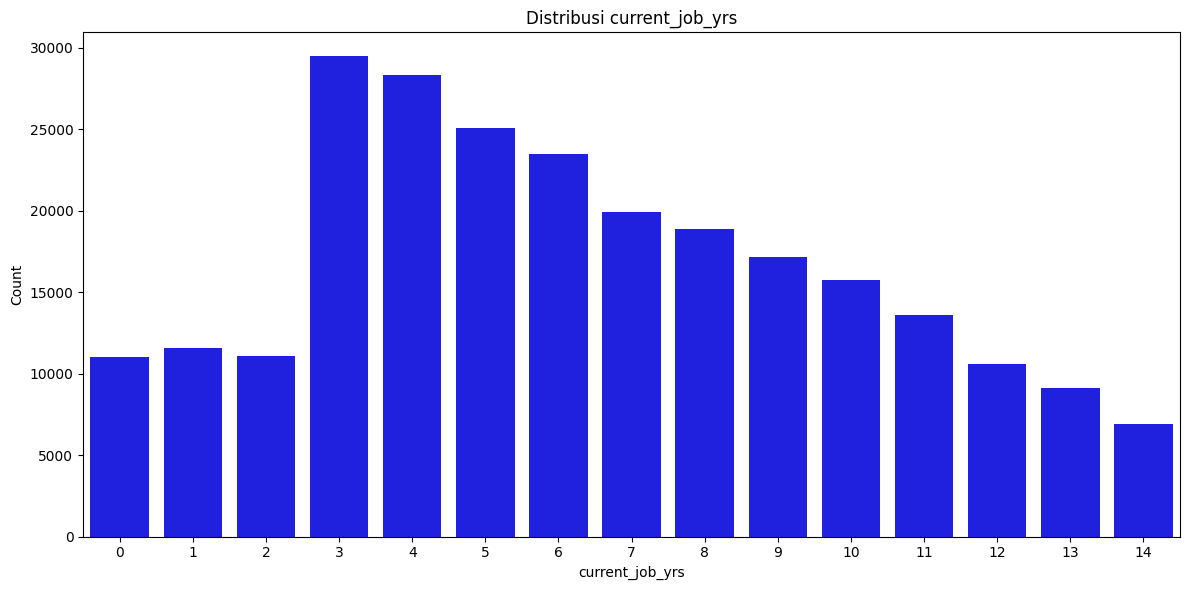

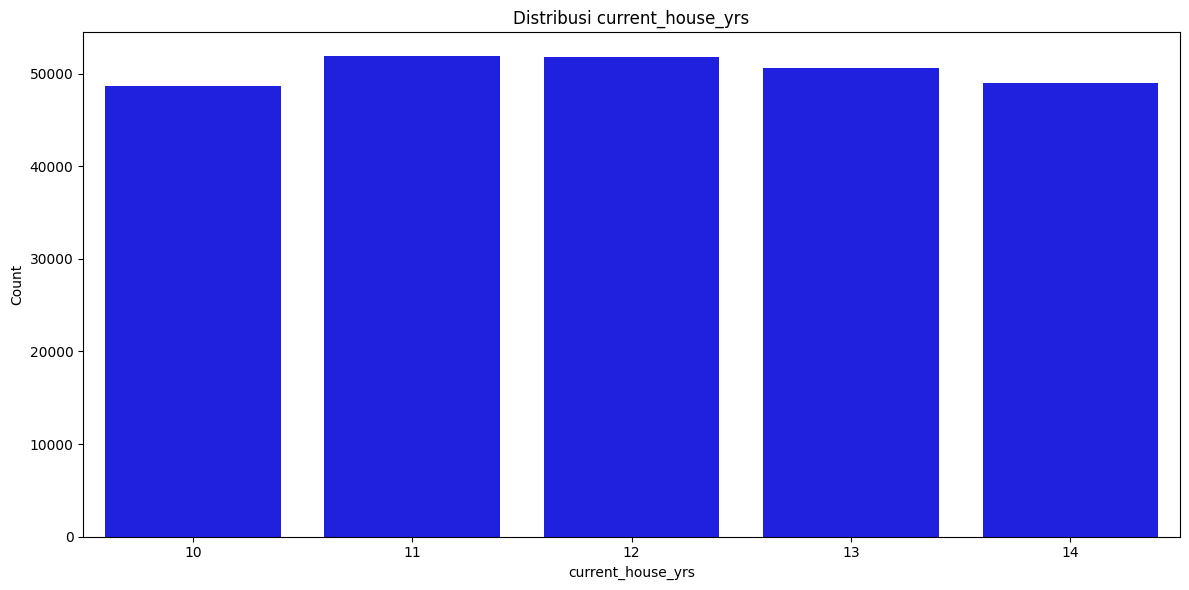

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

nums_ex_income = ['age', 'experience', 'current_job_yrs', 'current_house_yrs']
plt.figure(figsize=(12, 12))

for i in range(0, len(nums_ex_income)):
    plt.figure(figsize=(12, 6))  # Menyesuaikan ukuran plot agar lebih besar
    sns.countplot(data=df_train, x=nums_ex_income[i], color='blue')  # Menggunakan countplot
    plt.title(f"Distribusi {nums_ex_income[i]}")
    plt.xlabel(nums_ex_income[i])  # Menambahkan label sumbu X
    plt.ylabel('Count')  # Menambahkan label sumbu Y
    plt.tight_layout()
    plt.show()  # Menampilkan plot satu per satu


## interpretasi
* Kolom age menunjukkan distribusi umur kreditur/peminjam. Dari grafik tersebut menunjukkan bahwa rentang usia kreditur yang tercatat berada pada usia 21-79 tahun dengan kreditur terbanyak di usia 27 tahun.
* Kolom experience menunjukkan distribusi experience (pengalaman kerja) kreditur. Dapat terlihat bahwa pengalaman kerja kreditur beragam hingga 20 tahun dengan kreditur terbanyak memiliki pengalaman kerja 6 tahun.
* Kolom current_job_yrs menunjukkan distribusi lama bekerja berdasarkan tahun para kreditur. Dapat terlihat bahwa lama kerja para kreditur beragam hingga 14 tahun, dimana kreditur terbanyak memiliki lama bekerja 3 tahun.
* Kolom current_house_yrs menunjukkan lama tinggal kreditur di rumahnya saat ini berdasarkan tahun. Dapat terlihat bahwa rentang pada fitur ini dimulai dari 10 hingga 14 tahun dengan nilai 11 dan 12 tahun merupakan frekuensi terbanyak.

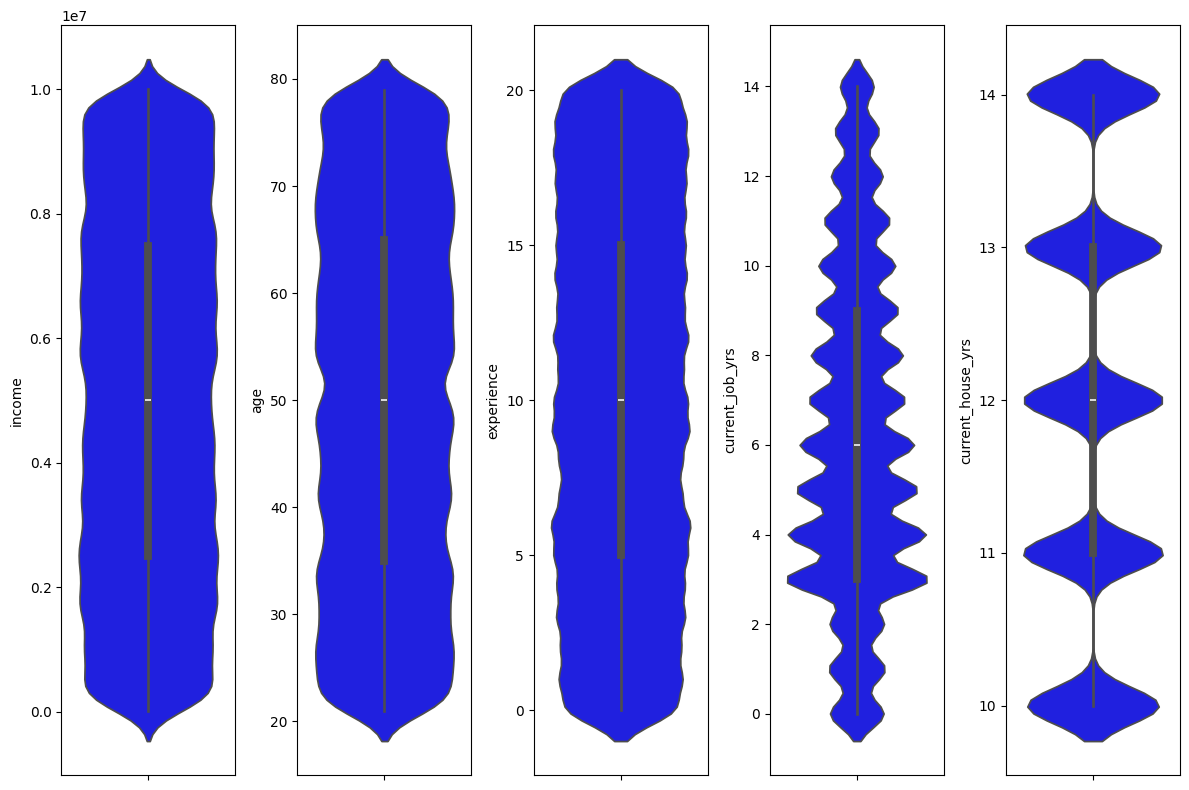

In [ ]:
#Analisis Violin plot

plt.figure(figsize=(12,8))

for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.violinplot(df_train, y= df_train[nums[i]],color='blue')
  plt.tight_layout()

plt.show()

### Interpretasi
* violinplot menunjukkan untuk keseluruhan kolom numeric tidak terdapat adanya outlier



### Data Kategorik

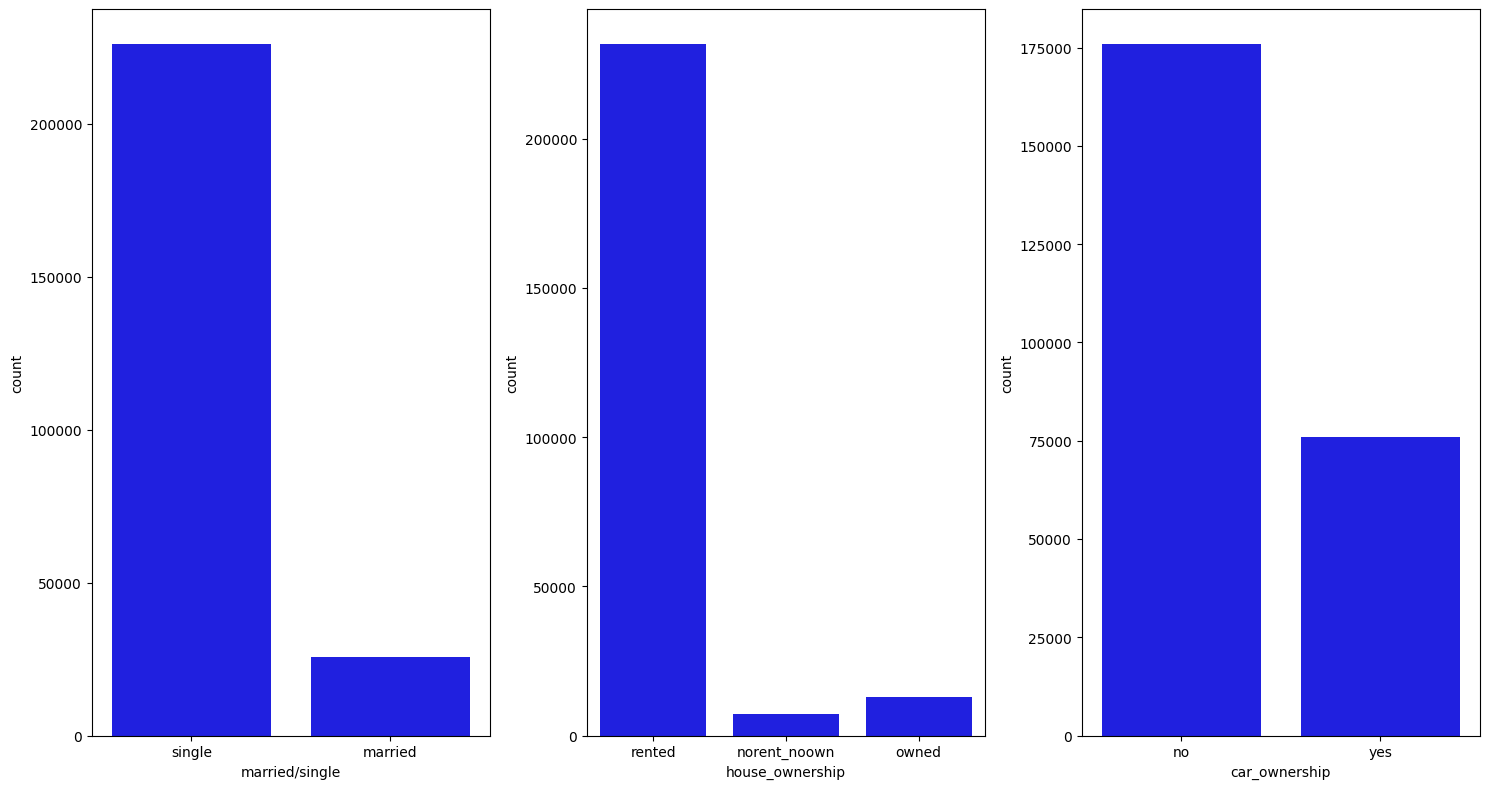

In [ ]:
plt.figure(figsize=(15,8))

filtered_cats = [col for col in cats if col not in ['profession','city','state']] #Tidak menampilkan karena datanya terlalu banyak

for i in range(0, len(filtered_cats)):
  plt.subplot(1, len(filtered_cats), i+1)
  sns.countplot(x= df_train[cats[i]],color='blue')
  plt.tight_layout()

plt.show()

## Interpretasi
Grafik di atas merupakan hasil Barplot untuk feature kategorikal (status, house_ownership dan car_ownership). Hasil Barplot menunjukkan bahwa mayoritas kreditur berstatus single, masih menyewa rumah dan tidak memiliki mobi

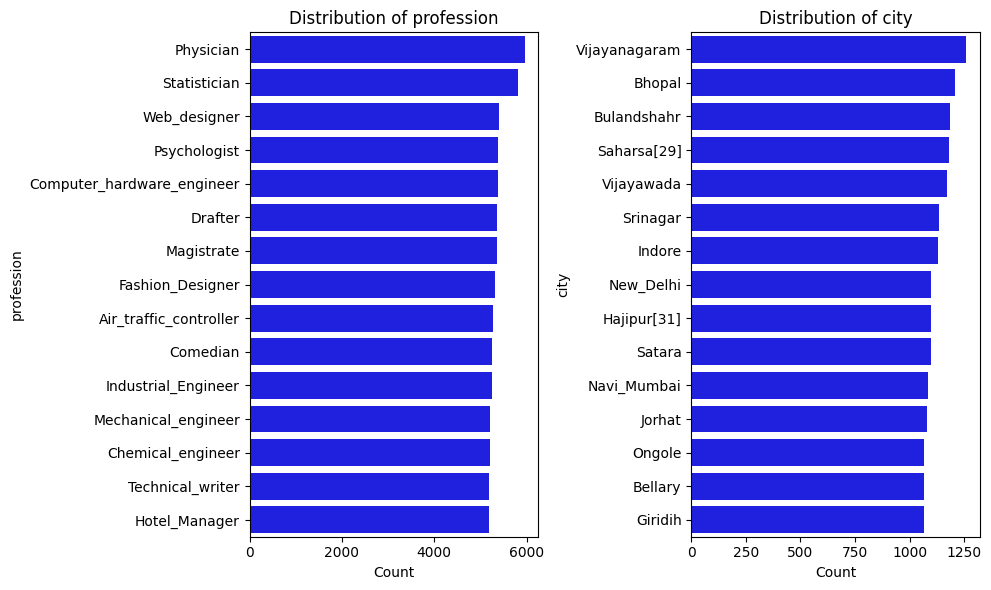

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom yang ingin dianalisis
long_cats = ['profession', 'city']

# Menentukan jumlah baris dan kolom untuk subplot
n_cols = len(long_cats)  # Jumlah kolom sesuai dengan jumlah kategori
n_rows = 1  # Satu baris

# Menentukan ukuran figure yang cukup lebar
plt.figure(figsize=(5 * n_cols, 6))  # Lebar figure disesuaikan agar cukup untuk semua plot

# Loop untuk menghasilkan bar plot horizontal untuk setiap kolom dalam long_cats
for i, cat in enumerate(long_cats):
    plt.subplot(n_rows, n_cols, i + 1)  # Membuat subplot untuk setiap kategori

    # Ambil 15 nilai teratas berdasarkan frekuensi
    top_15 = df_train[cat].value_counts().nlargest(15).index

    # Membuat bar plot horizontal untuk kategori dengan warna biru dan hanya menampilkan 15 data teratas
    sns.countplot(data=df_train, y=cat, color='blue', order=top_15)

    # Menambahkan judul dan label pada plot
    plt.title(f'Distribution of {cat}')
    plt.xlabel('Count')
    plt.ylabel(cat)

# Menyesuaikan layout agar tidak ada yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


## Interpretasi
Grafik barplot di atas merupakan persebaran kreditur berdasarkan profesi dan juga kota domisilinya. Dapat dilihat bahwa kedua feature tersebut menunjukkan frekuensi yang seragam. Kreditur lebih banyak berprofesi sebagai physician (tabib/dokter) dan berdomisili di Kota Vijayanagaram.


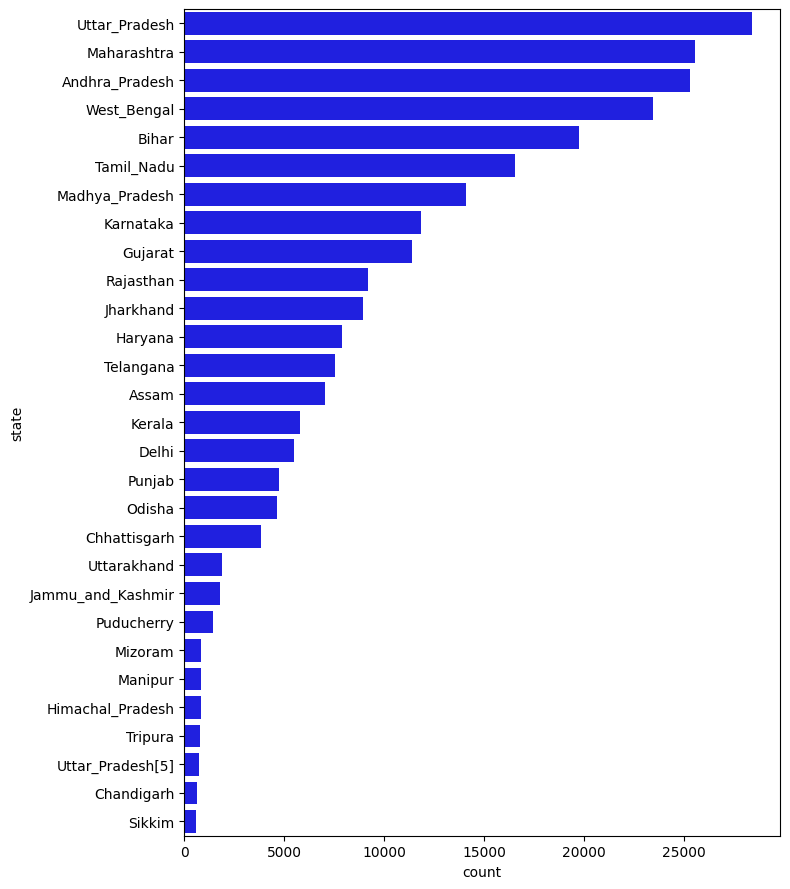

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung frekuensi dan mengurutkan berdasarkan nilai terbesar
state_order = df_train['state'].value_counts().index

# Membuat count plot horizontal untuk kolom 'state' yang diurutkan berdasarkan frekuensi
plt.figure(figsize=(8, 9))
sns.countplot(y=df_train['state'], color='blue', order=state_order)  # Menambahkan parameter order

# Menyesuaikan layout agar tidak ada yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


## Interpretasi
Grafik Barplot di atas menunjukkan persebaran negara bagian dari kreditur yang melakukan pinjaman. Dapat terlihat bahwa domisili kreditur didominasi oleh Uttar Pradesh, sedangkan Sikkim menjadi negara bagian dengan jumlah kreditur tercatat paling rendah.


## **Bivariate Analisis**

Kami melakukan bivariate analisis untuk melihat fitur-fitur yang tersedia terhadap nilai risk_flag

### Numeric Bivariate

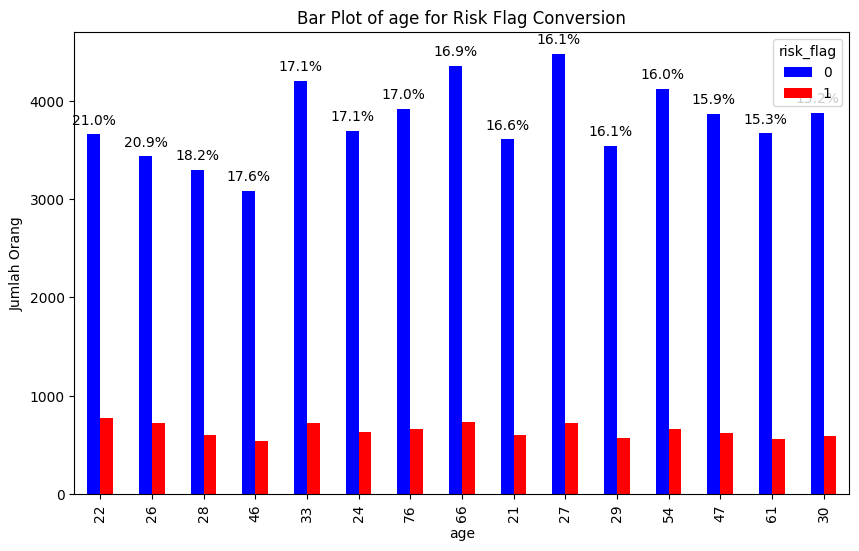

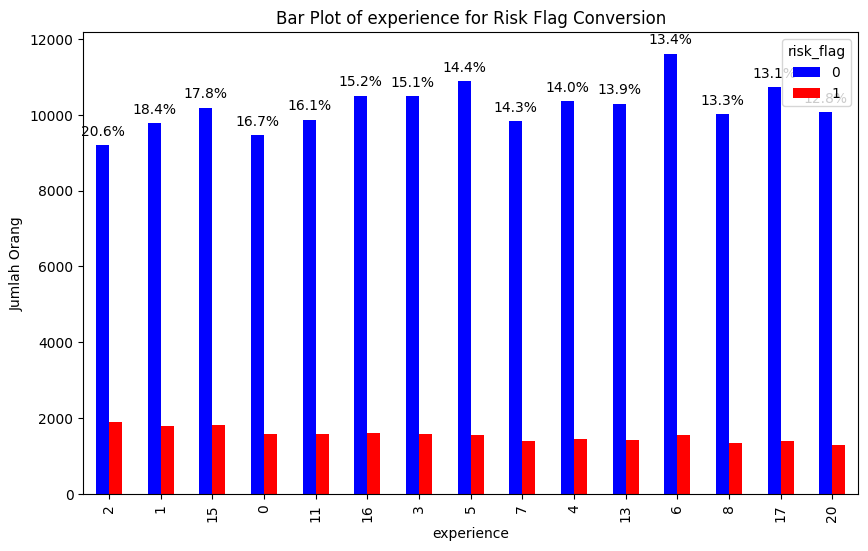

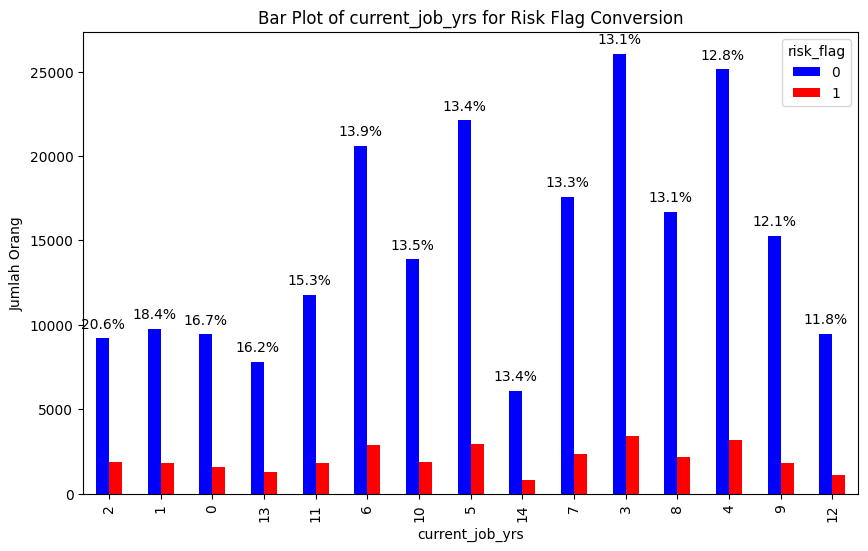

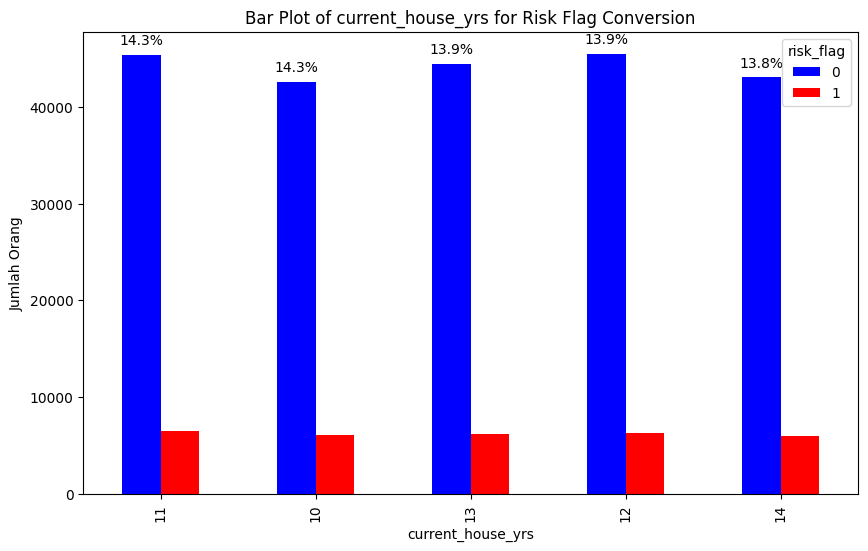

In [ ]:
import matplotlib.pyplot as plt

# Tentukan kolom yang ingin dipilih untuk analisis
nums_ex_income = ['age', 'experience', 'current_job_yrs', 'current_house_yrs']

# Loop untuk setiap kolom yang akan dianalisis
for cat in nums_ex_income:
    # Kelompokkan data berdasarkan kategori dan risk_flag, hitung jumlahnya
    count_data = df_train.groupby([cat, 'risk_flag']).size().unstack(fill_value=0)

    # Hitung konversi (risk_flag == 1 / risk_flag == 0) untuk mendapatkan rasio konversi
    count_data['conversion'] = (count_data[1] / count_data[0]) * 100

    # Urutkan berdasarkan konversi, ambil 15 kategori teratas
    count_data_sorted = count_data.sort_values(by='conversion', ascending=False).head(15)

    # Reset index untuk memudahkan pengambilan warna berdasarkan 'risk_flag'
    count_data_sorted = count_data_sorted.reset_index()

    # Tentukan warna untuk bar plot berdasarkan 'risk_flag' (merah untuk risk_flag=1, biru untuk risk_flag=0)
    colors = ['blue' if risk_flag == 0 else 'red' for risk_flag in count_data_sorted.index]

    # Membuat bar plot untuk kategori ini
    plt.figure(figsize=(10, 6))  # Ukuran plot lebih besar untuk keterbacaan
    ax = count_data_sorted.plot(x=cat, y=[0, 1], kind='bar', color=colors, ax=plt.gca())

    # Menambahkan label untuk rasio konversi di atas setiap batang
    for i, p in enumerate(ax.patches):
        # Pastikan index i berada dalam jangkauan data yang valid
        if i < len(count_data_sorted):
            height = p.get_height()
            x_position = p.get_x() + p.get_width() / 2
            conversion_value = round(count_data_sorted['conversion'].iloc[i],1)

            # Menambahkan label di atas batang
            ax.annotate(f'{conversion_value}%',
                        (x_position, height),
                        ha='center', va='bottom',
                        fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')

    # Menambahkan judul dan label pada plot
    plt.title(f'Bar Plot of {cat} for Risk Flag Conversion')
    plt.xlabel(cat)
    plt.ylabel('Jumlah Orang')

    # Menampilkan plot
    plt.show()

## Interpretasi
* Kolom age menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan umur. Dari gambar tersebut dapat terlihat bahwa persentase kreditur yang gagal bayar terbesar berada di usia 22 tahun, yaitu 21% dan persentase kreditur dengan gagal bayar terkecil berada di usia 30 tahun, dengan 15.2%.
* Kolom experience menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan pengalaman kerja. Dapat dilihat bahwa kreditur dengan 20 tahun pengalaman kerja memiliki persentase paling rendah untuk gagal bayar, sedangkan kreditur dengan pengalaman bekerja yang masih sedikit seperti 1-2 tahun memiliki persentase tinggi untuk mengalami gagal bayar.
* Kolom current_job_yrs menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan lama bekerja kreditur terhadap pekerjaannya yang sekarang. Dapat terlihat bahwa kreditur dengan lama bekerja 12 tahun memiliki persentase gagal bayar paling rendah, sedangkan kreditur yang belum lama bekerja (2 tahun) memiliki persentase gagal bayar paling tinggi hingga 20%
* Kolom current_house_yrs menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan lama tinggal kreditur di rumahnya yang sekarang. Secara garis besar, tidak terlihat perbedaan persentase yang signifikan akan gagal bayar kreditur dengan lamanya mereka tinggal di rumahnya.


### Kategorik Bivariate

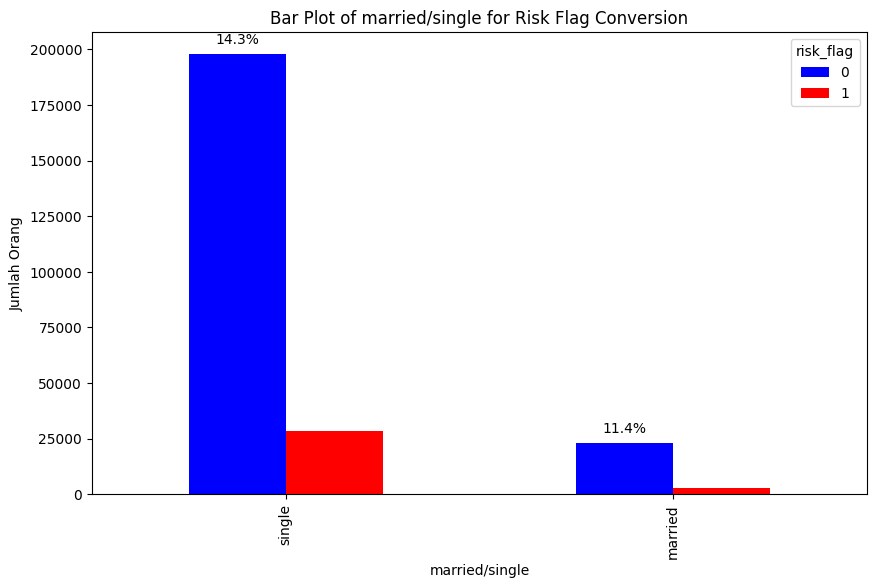

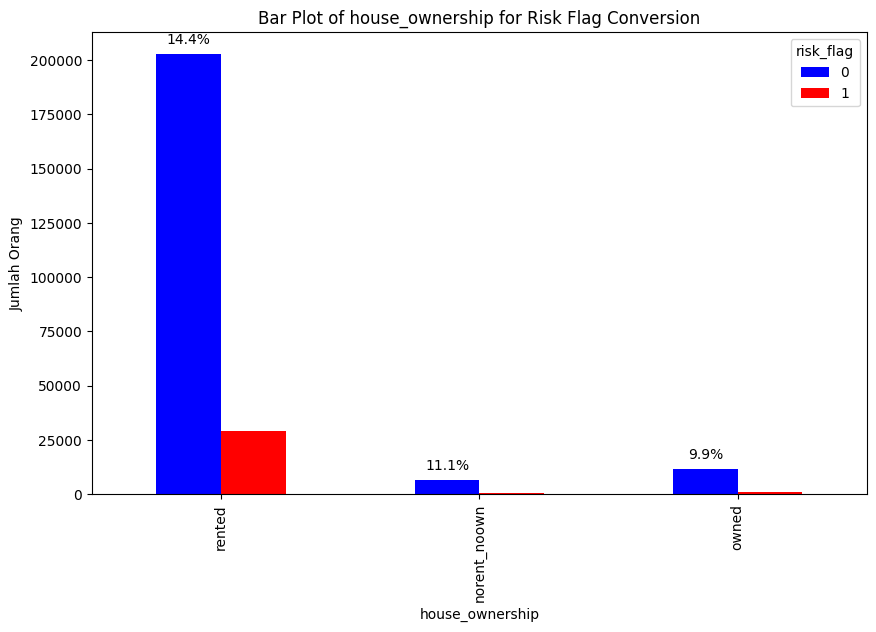

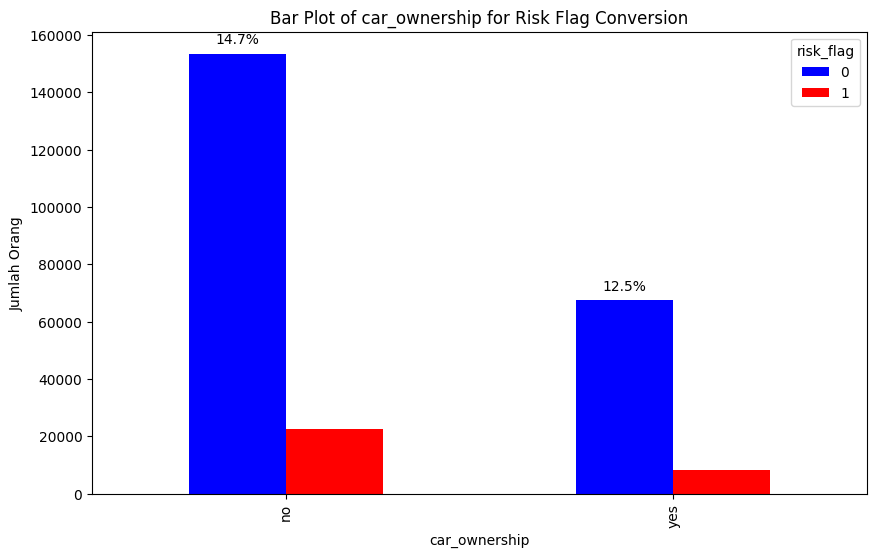

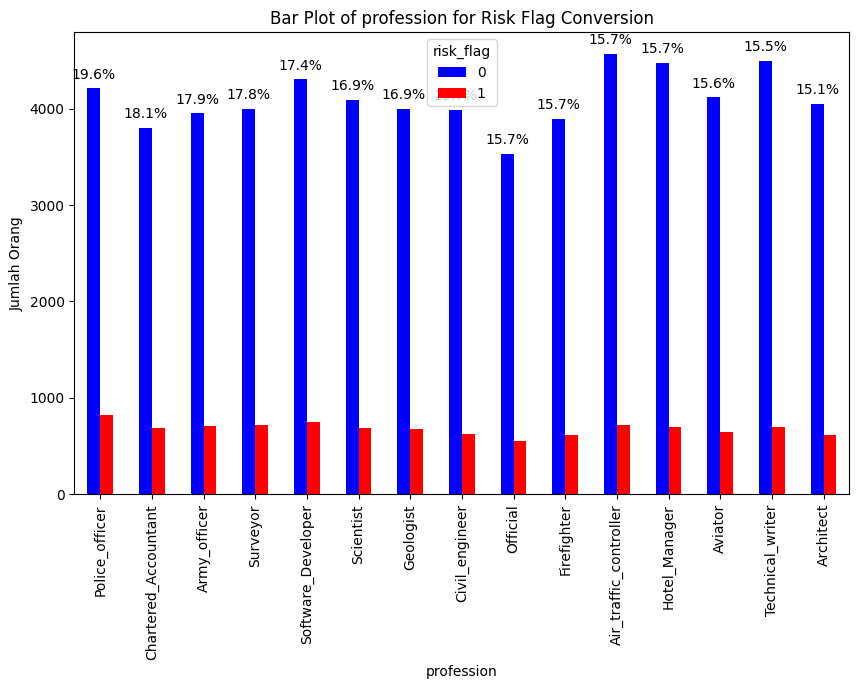

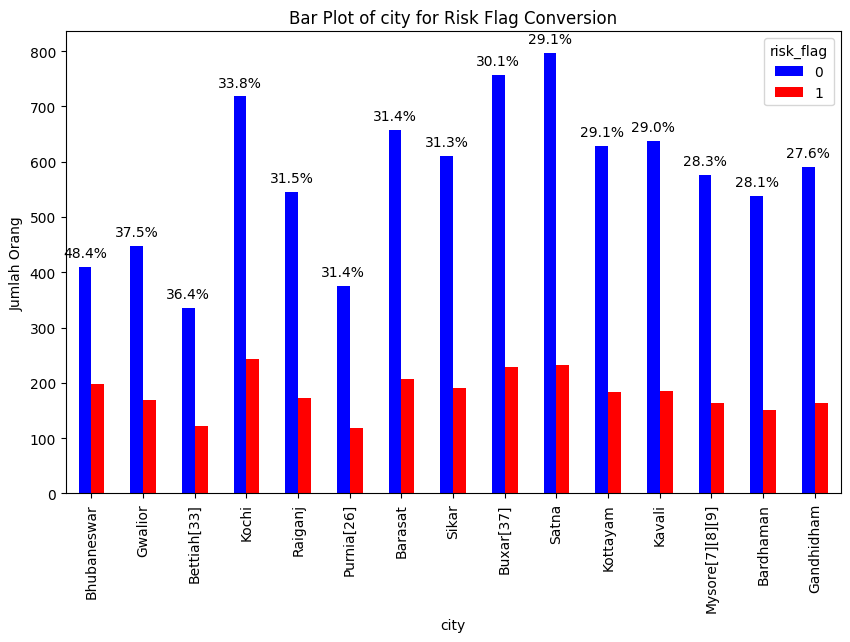

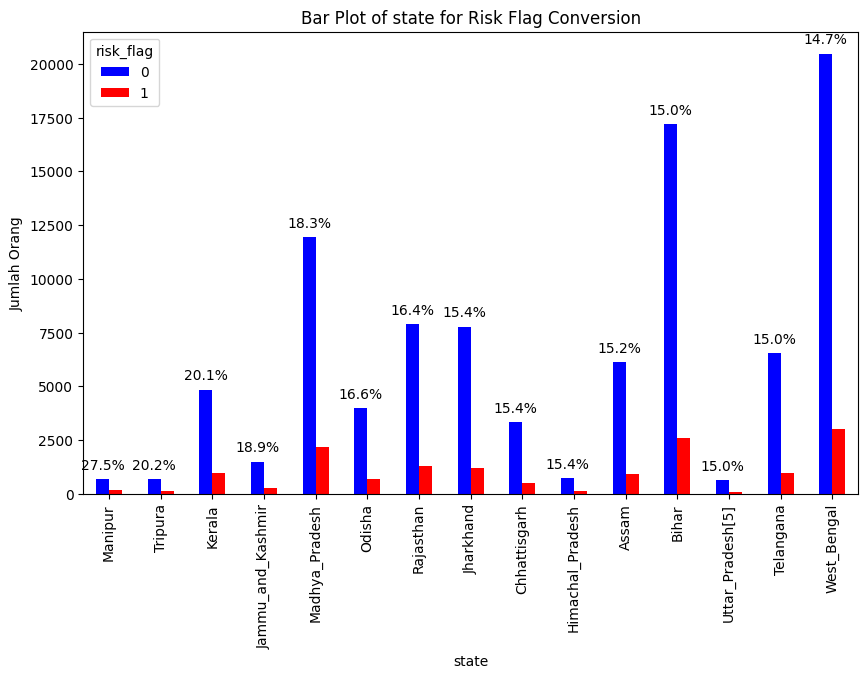

In [ ]:
import matplotlib.pyplot as plt

# Tentukan kolom yang ingin dipilih untuk analisis
cats = ['married/single', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']

# Loop untuk setiap kolom yang akan dianalisis
for x in cats:
    # Kelompokkan data berdasarkan kategori dan risk_flag, hitung jumlahnya
    count_data = df_train.groupby([x, 'risk_flag']).size().unstack(fill_value=0)

    # Hitung konversi (risk_flag == 1 / risk_flag == 0) untuk mendapatkan rasio konversi
    count_data['conversion'] = (count_data[1] / count_data[0]) * 100

    # Urutkan berdasarkan konversi, ambil 15 kategori teratas
    count_data_sorted = count_data.sort_values(by='conversion', ascending=False).head(15)

    # Reset index untuk memudahkan pengambilan warna berdasarkan 'risk_flag'
    count_data_sorted = count_data_sorted.reset_index()

    # Tentukan warna untuk bar plot berdasarkan 'risk_flag' (merah untuk risk_flag=1, biru untuk risk_flag=0)
    colors = ['blue' if risk_flag == 0 else 'red' for risk_flag in count_data_sorted.index]

    # Membuat bar plot untuk kategori ini
    plt.figure(figsize=(10, 6))  # Ukuran plot lebih besar untuk keterbacaan
    ax = count_data_sorted.plot(x=x, y=[0, 1], kind='bar', color=colors, ax=plt.gca())

    # Menambahkan label untuk rasio konversi di atas setiap batang
    for i, p in enumerate(ax.patches):
        # Pastikan index i berada dalam jangkauan data yang valid
        if i < len(count_data_sorted):
            height = p.get_height()
            x_position = p.get_x() + p.get_width() / 2
            conversion_value = round(count_data_sorted['conversion'].iloc[i],1)

            # Menambahkan label di atas batang
            ax.annotate(f'{conversion_value}%',
                        (x_position, height),
                        ha='center', va='bottom',
                        fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')

    # Menambahkan judul dan label pada plot
    plt.title(f'Bar Plot of {x} for Risk Flag Conversion')
    plt.xlabel(x)
    plt.ylabel('Jumlah Orang')

    # Menampilkan plot
    plt.show()

## Interpretasi

* Kolom married/single menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan status pernikahan. Dapat dilihat pada gambar bahwa kreditur yang single memiliki persentase gagal bayar lebih tinggi (14.3%) dibandingkan dengan kreditur yang sudah menikah.
* house_ownership menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan kepemilikan rumah. Dapat dilihat pada gambar bahwa kreditur yang rumahnya masih menyewa memiliki persentase gagal bayar paling banyak (14.4%) dibandingkan dengan kreditur lainnya.
* Kolom car_ownership menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan kepemilikan mobil. Dapat dilihat pada gambar bahwa kreditur yang tidak memiliki mobil memiliki persentase gagal bayar paling tinggi (14.7%) dibandingkan dengan kreditur yang telah memiliki mobil.
* Kolom Profession menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan profesi. Dapat dilihat pada gambar bahwa kreditur yang berprofesi sebagai polisi memiliki persentase gagal bayar paling tinggi hingga hampir mencapai 20% dibandingkan dengan profesi lainnya.
* Kolom city menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan kota domisili. Dapat dilihat pada gambar bahwa kreditur yang berdomisili di Kota Bhubaneswar memiliki persentase gagal bayar paling tinggi hingga 48.4% dibandingkan dengan kreditur dari kota lainnya.
* Kolom state menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan negara bagian. Dapat dilihat pada gambar bahwa kreditur yang berdomisili di negara bagian Manipur memiliki persentase gagal bayar paling tinggi hingga 27.5%.


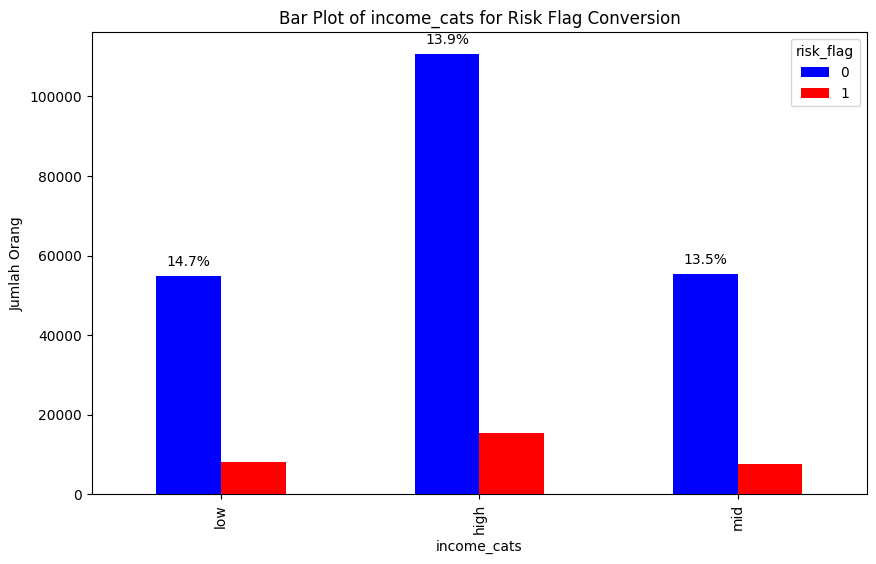

In [ ]:
import matplotlib.pyplot as plt

# Tentukan kolom yang ingin dipilih untuk analisis
cats_income = ['income_cats']

# Loop untuk setiap kolom yang akan dianalisis
for x in cats_income:
    # Kelompokkan data berdasarkan kategori dan risk_flag, hitung jumlahnya
    count_data = df_train.groupby([x, 'risk_flag']).size().unstack(fill_value=0)

    # Hitung konversi (risk_flag == 1 / risk_flag == 0) untuk mendapatkan rasio konversi
    count_data['conversion'] = (count_data[1] / count_data[0]) * 100

    # Urutkan berdasarkan konversi, ambil 15 kategori teratas
    count_data_sorted = count_data.sort_values(by='conversion', ascending=False).head(15)

    # Reset index untuk memudahkan pengambilan warna berdasarkan 'risk_flag'
    count_data_sorted = count_data_sorted.reset_index()

    # Tentukan warna untuk bar plot berdasarkan 'risk_flag' (merah untuk risk_flag=1, biru untuk risk_flag=0)
    colors = ['blue' if risk_flag == 0 else 'red' for risk_flag in count_data_sorted.index]

    # Membuat bar plot untuk kategori ini
    plt.figure(figsize=(10, 6))  # Ukuran plot lebih besar untuk keterbacaan
    ax = count_data_sorted.plot(x=x, y=[0, 1], kind='bar', color=colors, ax=plt.gca())

    # Menambahkan label untuk rasio konversi di atas setiap batang
    for i, p in enumerate(ax.patches):
        # Pastikan index i berada dalam jangkauan data yang valid
        if i < len(count_data_sorted):
            height = p.get_height()
            x_position = p.get_x() + p.get_width() / 2
            conversion_value = round(count_data_sorted['conversion'].iloc[i],1)

            # Menambahkan label di atas batang
            ax.annotate(f'{conversion_value}%',
                        (x_position, height),
                        ha='center', va='bottom',
                        fontsize=10, color='black',
                        xytext=(0, 5), textcoords='offset points')

    # Menambahkan judul dan label pada plot
    plt.title(f'Bar Plot of {x} for Risk Flag Conversion')
    plt.xlabel(x)
    plt.ylabel('Jumlah Orang')

    # Menampilkan plot
    plt.show()

## Interpretasi

Grafik diatas menunjukkan bar plot yang merupakan konversi (%) kreditur yang mengalami gagal bayar dengan yang tidak berdasarkan pendapatan/gaji. Dapat dilihat pada gambar bahwa kreditur dengan gaji rendah memiliki persentase gagal bayar paling tinggi hingga 14.7%.

## **Multivariate Analisis**

## Corelation Heatmap

<Axes: >

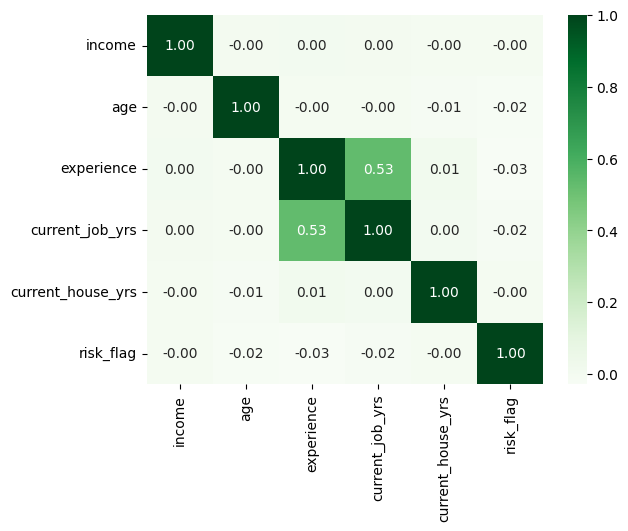

In [ ]:
sns.heatmap(num_df.corr(method='kendall'), cmap='Greens', annot=True, fmt='.2f')

## Interpretasi
Dari Grafik heatmap di atas, korelasi antar feature numerik dan feature-target yang dihasilkan lemah. Hal ini menunjukkan bahwa tidak adanya multikolinearitas antar feature dan masing-masing feature tidak memiliki hubungan yang signifikan dengan target. Lalu kami juga melakukan analisis apakah fitur numerik kami berkorelasi dengan target secara linear atau tidak dengan menggunakan pairplot

In [ ]:
from scipy.stats import pointbiserialr

# Daftar fitur numerik yang akan diuji
nums = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']

# Inisialisasi dictionary untuk menyimpan hasil
pointbiserial_results = {}

# Iterasi untuk setiap fitur numerik
for feature in nums:
    # Hitung korelasi point-biserial antara fitur dan target
    correlation, p_value = pointbiserialr(df_train["risk_flag"], df_train[feature])

    # Simpan hasil dalam dictionary
    pointbiserial_results[feature] = {'Correlation': correlation, 'P-Value': p_value}

    # Cetak signifikansi
    significance = "Signifikan" if p_value < 0.05 else "Tidak Signifikan"
    print(f"Fitur: {feature}, Korelasi: {correlation:.4f}, P-Value: {p_value:.4e} ({significance})")

# Konversi hasil ke DataFrame untuk visualisasi
pointbiserial_df = pd.DataFrame(pointbiserial_results).T

# Menampilkan tabel hasil
print("\nHasil Korelasi Point-Biserial terhadap target:")
print(pointbiserial_df)


Fitur: income, Korelasi: -0.0031, P-Value: 1.2072e-01 (Tidak Signifikan)
Fitur: age, Korelasi: -0.0218, P-Value: 6.6876e-28 (Signifikan)
Fitur: experience, Korelasi: -0.0345, P-Value: 2.5476e-67 (Signifikan)
Fitur: current_job_yrs, Korelasi: -0.0169, P-Value: 1.8132e-17 (Signifikan)
Fitur: current_house_yrs, Korelasi: -0.0044, P-Value: 2.8069e-02 (Signifikan)

Hasil Korelasi Point-Biserial terhadap target:
                   Correlation       P-Value
income               -0.003091  1.207220e-01
age                  -0.021809  6.687624e-28
experience           -0.034523  2.547563e-67
current_job_yrs      -0.016942  1.813221e-17
current_house_yrs    -0.004375  2.806947e-02


In [ ]:
from scipy.stats import f_oneway

# Daftar fitur numerik diskrit yang akan diuji
nums = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']

# Inisialisasi dictionary untuk menyimpan hasil
anova_results = {}

# Iterasi untuk setiap fitur numerik diskrit
for feature in nums:
    # Pisahkan data berdasarkan kategori target (0 dan 1)
    group_0 = df_train[df_train["risk_flag"] == 0][feature]
    group_1 = df_train[df_train["risk_flag"] == 1][feature]

    # Lakukan uji ANOVA
    f_stat, p_value = f_oneway(group_0, group_1)

    # Simpan hasil dalam dictionary
    anova_results[feature] = {'F-Statistic': f_stat, 'P-Value': p_value}

    # Cetak signifikansi
    significance = "Signifikan" if p_value < 0.05 else "Tidak Signifikan"
    print(f"Fitur: {feature}, F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4e} ({significance})")

# Konversi hasil ke DataFrame untuk visualisasi
anova_df = pd.DataFrame(anova_results).T

# Menampilkan tabel hasil
print("\nHasil ANOVA terhadap target:")
print(anova_df)


Fitur: income, F-Statistic: 2.4079, P-Value: 1.2072e-01 (Tidak Signifikan)
Fitur: age, F-Statistic: 119.9185, P-Value: 6.6876e-28 (Signifikan)
Fitur: experience, F-Statistic: 300.6923, P-Value: 2.5476e-67 (Signifikan)
Fitur: current_job_yrs, F-Statistic: 72.3485, P-Value: 1.8132e-17 (Signifikan)
Fitur: current_house_yrs, F-Statistic: 4.8239, P-Value: 2.8069e-02 (Signifikan)

Hasil ANOVA terhadap target:
                   F-Statistic       P-Value
income                2.407945  1.207220e-01
age                 119.918507  6.687624e-28
experience          300.692307  2.547563e-67
current_job_yrs      72.348526  1.813221e-17
current_house_yrs     4.823851  2.806947e-02


<Axes: xlabel='income', ylabel='risk_flag'>

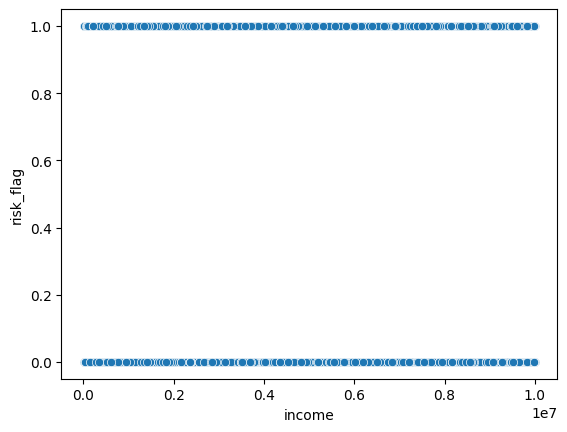

In [ ]:
sns.scatterplot(data=df_train, x='income', y='risk_flag')

## Interpretasi

* Untuk feature income tidak memiliki korelasi dengan target berdasarkan metode Point Biserial
* pada heatmap diatas hubungan antar feature dan target tidak memiliki korelasi yang kuat / lemah, sehingga feature yang tersedia tidak memberikan pengaruh signifikan terhadap prediksi pada target

## Pairplot

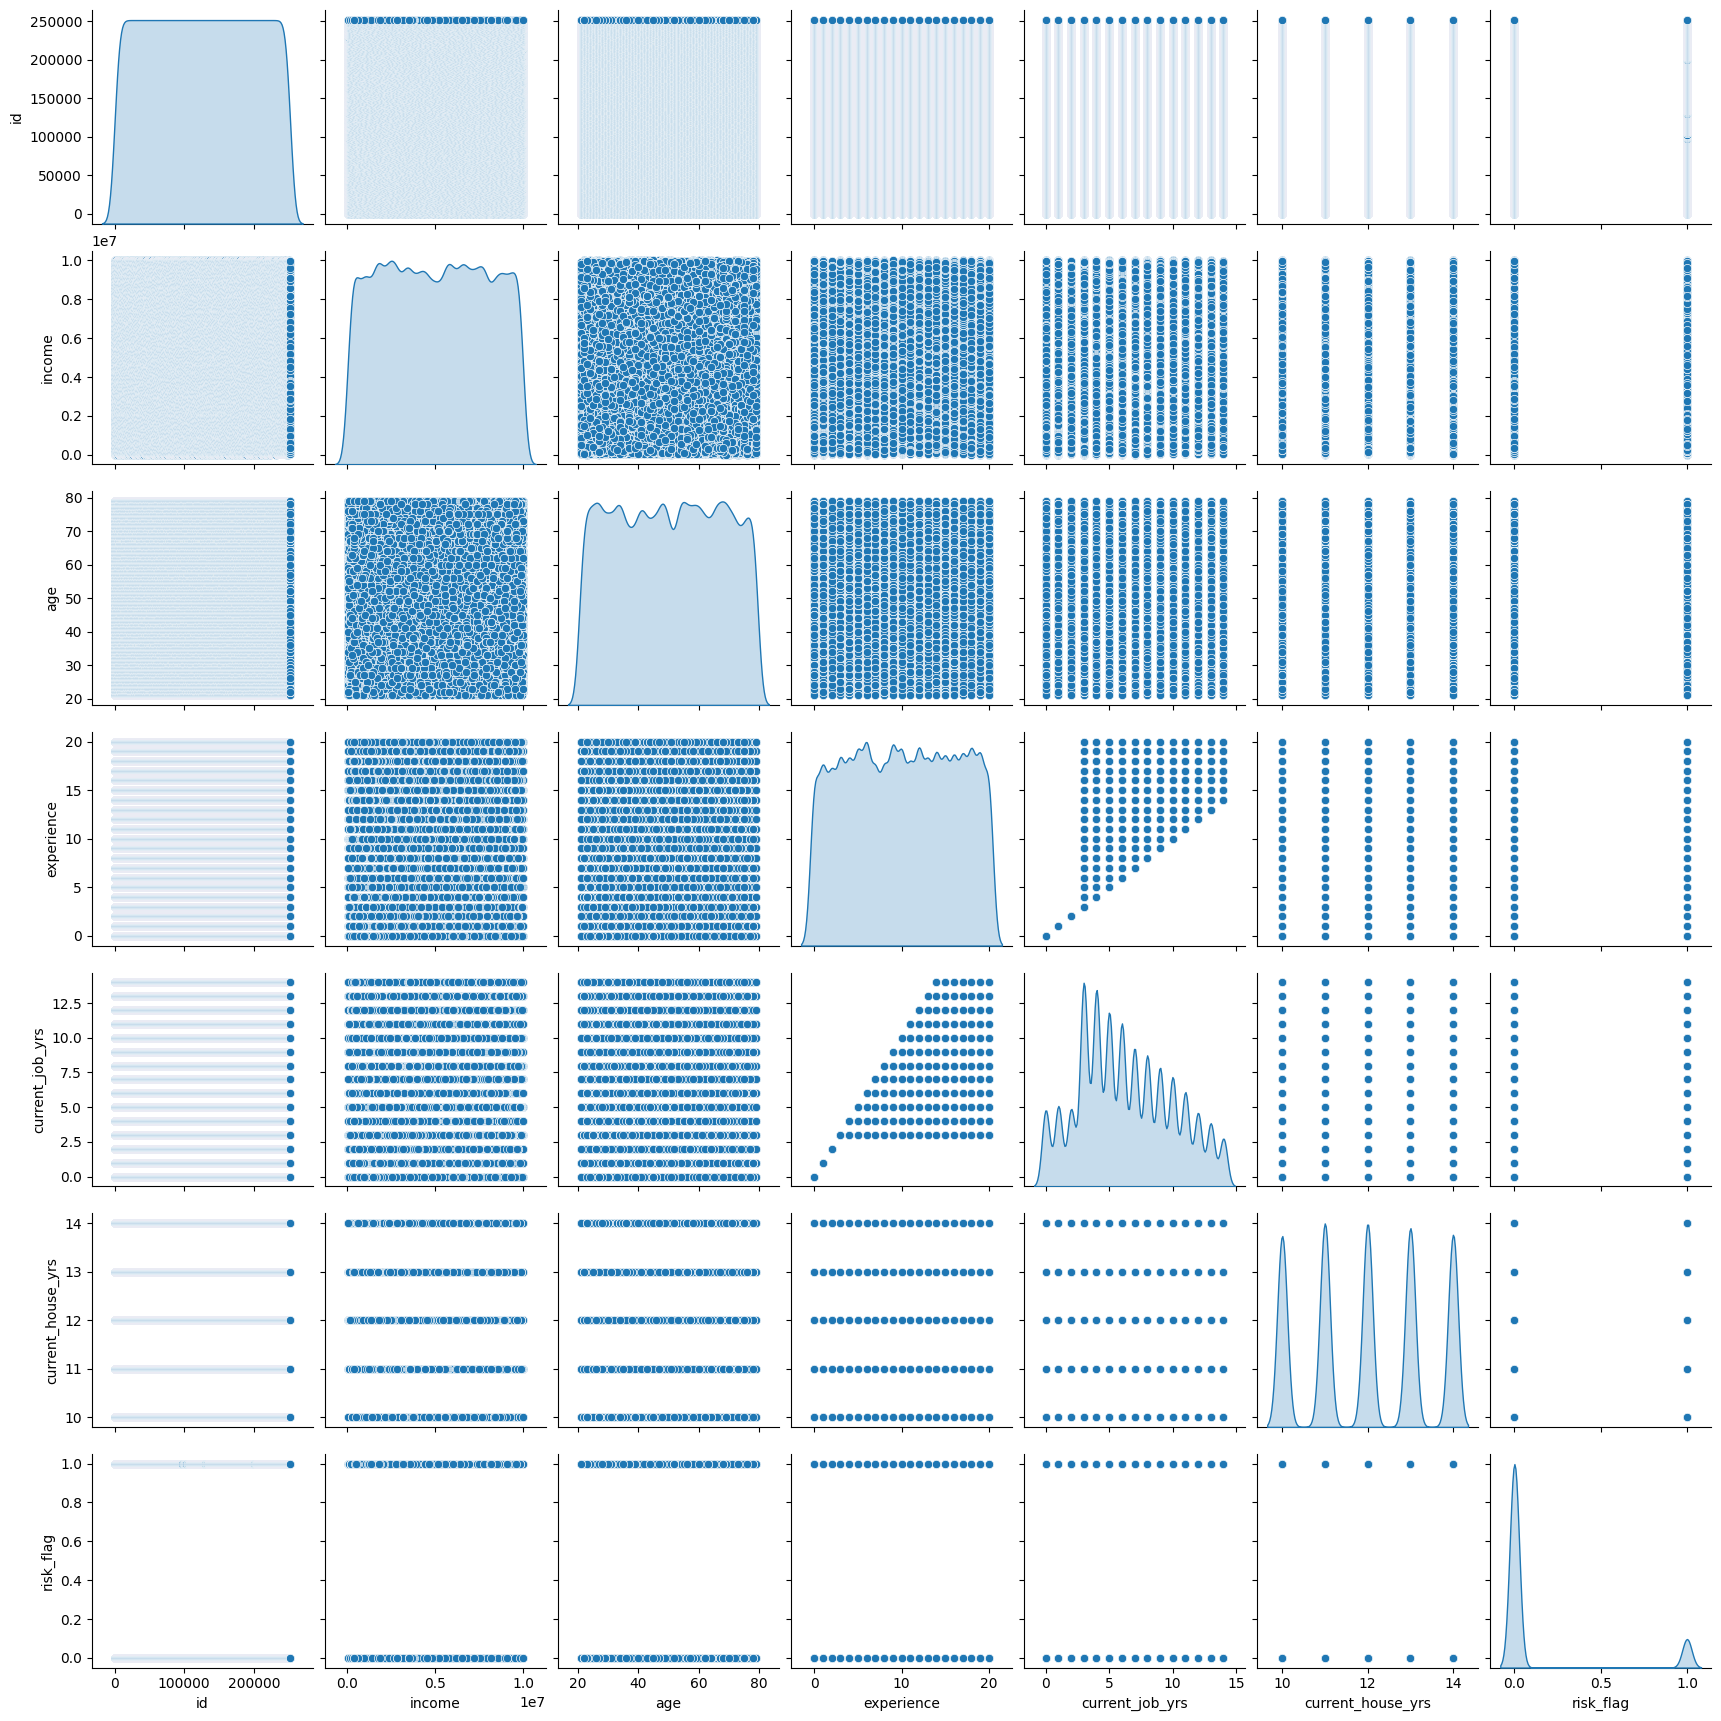

In [ ]:
sns.pairplot(df_train, diag_kind='kde')

## Interpretasi
Dari visualisasi pairplot diatas, dapat dilihat bahwa fitur dan target tidak berkorelasi secara linear, oleh karena itu kami menggunakan metode lain untuk menganalisis korelasi yang bentuknya tidak linear dengan menggunakan metode Point-Biserial

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Daftar fitur yang akan diuji
cats = ['married/single', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']

# Inisialisasi dictionary untuk menyimpan hasil
chi2_results = {}

# Iterasi untuk setiap fitur
for feature in cats:
    # Buat tabel kontingensi antara fitur dan target
    contingency_table = pd.crosstab(df_train[feature], df_train['risk_flag'])

    # Hitung Chi-Square
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Simpan hasil dalam dictionary
    chi2_results[feature] = {'Chi2': chi2, 'P-Value': p, 'DOF': dof}

# Konversi hasil ke DataFrame untuk visualisasi
chi2_df = pd.DataFrame(chi2_results).T

# Menentukan korelasi signifikan berdasarkan threshold p-value
alpha = 0.05  # Taraf signifikansi
significant_features = chi2_df[chi2_df['P-Value'] < alpha]
print("\nFitur signifikan terhadap target berdasarkan uji Chi-Square:")
print(significant_features)



Fitur signifikan terhadap target berdasarkan uji Chi-Square:
                        Chi2        P-Value    DOF
married/single    111.892047   3.773054e-26    1.0
house_ownership   182.989241   1.838193e-40    2.0
car_ownership     145.423744   1.735085e-33    1.0
profession        613.486209   5.108642e-98   50.0
city             5223.113292   0.000000e+00  316.0
state             733.396800  2.005747e-136   28.0


## Interpretasi
- Fitur status pernikahan, kepemilikan rumah dan mobil, profesi, kota dan negara bagian memiliki korelasi yang signifikan terhadap gagal atau tidaknya kreditur membayar pinjaman, dimana feature city dan state yang berkorelasi paling tinggi terhadap target.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Daftar fitur yang akan diuji
cats1 = ['married/single', 'house_ownership', 'car_ownership', 'profession', 'state']

# Inisialisasi dictionary untuk menyimpan hasil
chi2_results = {}

# Iterasi untuk setiap fitur
for feature in cats1:
    # Buat tabel kontingensi antara fitur dan target
    contingency_table = pd.crosstab(df_train[feature], df_train['city'])

    # Hitung Chi-Square
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Simpan hasil dalam dictionary
    chi2_results[feature] = {'Chi2': chi2, 'P-Value': p, 'DOF': dof}

# Konversi hasil ke DataFrame untuk visualisasi
chi2_df = pd.DataFrame(chi2_results).T

# Menentukan korelasi signifikan berdasarkan threshold p-value
alpha = 0.05  # Taraf signifikansi
significant_features = chi2_df[chi2_df['P-Value'] < alpha]
print("\nFitur signifikan terhadap target berdasarkan uji Chi-Square:")
print(significant_features)



Fitur signifikan terhadap target berdasarkan uji Chi-Square:
                         Chi2  P-Value      DOF
married/single   9.402240e+03      0.0    316.0
house_ownership  1.810996e+04      0.0    632.0
car_ownership    9.464275e+03      0.0    316.0
profession       4.831490e+05      0.0  15800.0
state            7.056000e+06      0.0   8848.0


## Interpretasi
Dari hasil chi square di atas, yang membandingkan feature-feature lain dengan feature city, feature state memiliki nilai korelasi yang paling besar yang mengidentifikasikan bahwa feature state multikolinearitas dengan feature city